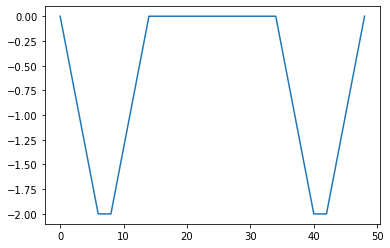

In [24]:
def mv(L, talud, diepte, breedte, mv_hoogte):
    import matplotlib.pyplot as plt
    
    xa = 0
    xb = xa + talud * diepte
    xc = xb + breedte
    xd = xc + talud * diepte
    xe = xd + L
    xf = xe + talud * diepte
    xg = xf + breedte
    xh = xg + talud * diepte
    
    ya = mv_hoogte
    yb = ya - diepte
    yc = yb
    yd = yc + diepte
    ye = yd
    yf = ye - diepte
    yg = yf
    yh = yg + diepte
    
    x = [xa,xb,xc,xd,xe,xf,xg,xh]
    y = [ya,yb,yc,yd,ye,yf,yg,yh]
    
    plot = plt.plot(x,y)

    
    return plot

mv = mv(20, 3, 2, 2, 0)

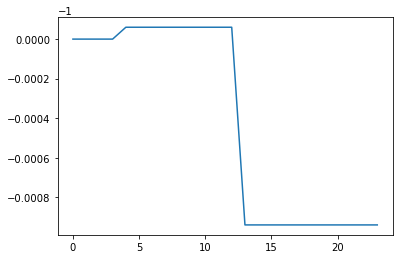

In [21]:
#x mm blokbui
P40 = []
P60 = [0,0,0,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
P80 = []
P100 = []

#Verdamping zomer en winter
Ez = [0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0]
Ew = [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]


def groundwater_ts(neerslag, verdamping, doorlatendheid, simulatieduur, hg0):
    import matplotlib.pyplot as plt
    #create lists
    t_list = []
    hg_list = []

    #assign values to variables 
    S = simulatieduur
    hg = hg0
    k = doorlatendheid
    
    #start list with values for t=0
    t_list.append(0)
    hg_list.append(hg0)

    #for loop to go through 
    for i in list(range(1, S, 1)):
        
        P = neerslag[i-1]
        E = verdamping[i-1] 

        t = i
        hg = hg + P/1000 - E/1000 * k

        t_list.append(t)
        hg_list.append(hg)
    
    plot = plt.plot(t_list, hg_list)
        
    return t_list, hg_list, plot

t, hg, plot = groundwater_ts(neerslag=P60, verdamping=Ew, doorlatendheid=1, simulatieduur=24, hg0=-1)

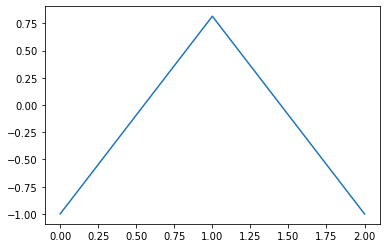

In [27]:
# x mm blokbui
P40 = 40
P60 = 60
P80 = 80
P100 = 100

#Verdamping zomer en winter
Ez = 3
Ew = 1

def groundwater_lv(neerslag, verdamping, doorlatendheid, begin_waterstand, afstand_waterwegen, afstand_ondoorlatendelaag):
    import matplotlib.pyplot as plt
    
    #create lists for time, waterlevel 2x and bulge groundwater
    hg_list = []

    #assign values to variables 
    h1 = begin_waterstand
    hg = begin_waterstand
    h2 = begin_waterstand
    k = doorlatendheid
    P = neerslag
    E = verdamping
    L = afstand_waterwegen
    D = afstand_ondoorlatendelaag
    
    #calculation groundwater Hooghoudt
    h = ((P/1000 - E/1000) * L ** 2) / (8 * k * D)

    h1 = h1 * -1
    h2 = h2 * -1
    hg = hg - h

    hg_list.append(h1)
    hg_list.append(hg)
    hg_list.append(h2)

    plot = plt.plot(hg_list)
        
    return hg_list, plot

hg, plot = groundwater_lv(neerslag=P60, verdamping=Ew, doorlatendheid=0.8, begin_waterstand=1, afstand_waterwegen=10, afstand_ondoorlatendelaag=5)

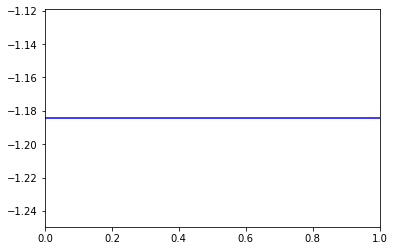

In [25]:
# x mm blokbui
P40 = 40
P60 = 60
P80 = 80
P100 = 100

#Verdamping zomer en winter
Ez = 3
Ew = 1

def groundwater_lv(neerslag, verdamping, doorlatendheid, begin_waterstand, afstand_waterwegen, afstand_ondoorlatendelaag):
    import matplotlib.pyplot as plt

    #assign values to variables 
    hg = begin_waterstand
    k = doorlatendheid
    P = neerslag
    E = verdamping
    L = afstand_waterwegen
    D = afstand_ondoorlatendelaag
    
    #calculation groundwater Hooghoudt
    h = ((P/1000 - E/1000) * L ** 2) / (8 * k * D)

    hg = hg - h

    plt.axhline(y = hg, color = 'b', linestyle = '-') 
        
    return hg, plot

hg, plot = groundwater_lv(neerslag=P60, verdamping=Ew, doorlatendheid=0.8, begin_waterstand=-1, afstand_waterwegen=10, afstand_ondoorlatendelaag=5)

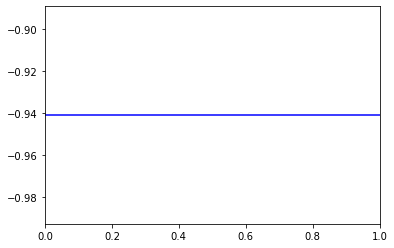

In [31]:
# x mm blokbui
P40 = 40
P60 = 60
P80 = 80
P100 = 100

#Verdamping zomer en winter
Ez = 3
Ew = 1

def groundwater_darcy(neerslag, verdamping, doorlatendheid, begin_waterstand, afstand_waterwegen):
    import matplotlib.pyplot as plt

    #assign values to variables 
    h = begin_waterstand
    hg = begin_waterstand
    k = doorlatendheid
    P = neerslag
    E = verdamping
    L = afstand_waterwegen
    i = abs(h - hg) / (0.5 * L)
    
    #calculation groundwater Darcy
    q = k * i
    hg = hg + P/1000 - E/1000 - q

    plt.axhline(y = hg, color = 'b', linestyle = '-') 
        
    return hg, plot

hg, plot = groundwater_darcy(neerslag=P60, verdamping=Ew, doorlatendheid=0.8, begin_waterstand=-1, afstand_waterwegen=10)

[0, -2, -2, 0, 0, -2, -2, 0]


TypeError: only integer scalar arrays can be converted to a scalar index

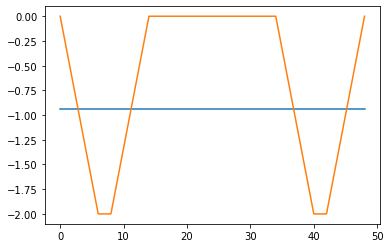

In [82]:
import numpy as np
from array import array
import matplotlib.pyplot as plt

# x mm blokbui
P40 = 40
P60 = 60
P80 = 80
P100 = 100

#Evaporation summer and winter
Es = 3
Ew = 1

def groundwater_darcy(neerslag, verdamping, doorlatendheid, begin_waterstand, afstand_waterwegen):
    import matplotlib.pyplot as plt
    import numpy as np
    
    def mv(L, talud, diepte, breedte, mv_hoogte):
        import matplotlib.pyplot as plt
        
        #Point on the x-axis for groundlevel
        xa = 0
        xb = xa + talud * diepte
        xc = xb + breedte
        xd = xc + talud * diepte
        xe = xd + L
        xf = xe + talud * diepte
        xg = xf + breedte
        xh = xg + talud * diepte

        #Points on the y-axis for groundlevel
        ya = mv_hoogte
        yb = ya - diepte
        yc = yb
        yd = yc + diepte
        ye = yd
        yf = ye - diepte
        yg = yf
        yh = yg + diepte
        
        #Create lists of the points for groundlevel
        x = [xa,xb,xc,xd,xe,xf,xg,xh]
        y = [ya,yb,yc,yd,ye,yf,yg,yh]

        return x, y

    #Use defenition to find groundlevel with given parameters
    mvx, mvy = mv(20, 3, 2, 2, 0)
    print(mvy)
    #Assign values to variables for groundwatercalculation
    h = begin_waterstand
    hg = begin_waterstand
    k = doorlatendheid
    P = neerslag
    E = verdamping
    L = afstand_waterwegen
    i = abs(h - hg) / (0.5 * L)
    
    #Calculation groundwater Darcy
    q = k * i
    hg = hg + P/1000 - E/1000 - q

    #Create a horizontal line showing the groundwaterlevel
    #plt.axhline(y = hg, color = 'b', linestyle = '-') 
     
    #Output is the a float for the groundwaterlevel and the plot
    return hg, mvx, mvy

#Use defenition to find groundwaterlevel
hg, mvx, mvy = groundwater_darcy(neerslag=P60, verdamping=Ew, doorlatendheid=0.8, begin_waterstand=-1, afstand_waterwegen=10)

#Turn the lists for ground- and waterlevel into arrays
hg_list = [hg] * 8
hg_array = np.array(hg_list)
mvy_array = np.array(mvy)

#Find the intersection for the ground- and waterlevel
x = np.arange(0, 8)

plt.plot(mvx, hg_list)
plt.plot(mvx, mvy)

idx = np.argwhere(np.diff(np.sign(mvy_array - hg_array))).flatten()
plt.plot(mvx[idx], f[idx], 'ro')
